IMPACT OF DIGITAL LEARNING ON MATHEMATICS ACHIEVEMENT
Statistical Analysis Report


1. DATA OVERVIEW
----------------------------------------------------------------------
Total Students: 60
Digital Learning Group: 30
Conventional Learning Group: 30

First few rows of data:
   Student_ID    Group  Math_Score Gender  Attendance (%)
0        1000  Digital          85      F              86
1        1001  Digital          81      M              94
2        1002  Digital          86      F              97
3        1003  Digital          91      M              98
4        1004  Digital          81      M              93


2. DESCRIPTIVE STATISTICS
----------------------------------------------------------------------

Digital Learning Group:
  Mean: 80.90
  Median: 81.00
  Std Dev: 5.32
  Min: 71
  Max: 91
  Range: 20

Conventional Learning Group:
  Mean: 74.10
  Median: 74.50
  Std Dev: 6.47
  Min: 61
  Max: 88
  Range: 27

Mean Difference: 6.80 points


3. ASSUMPTION CHECKS FOR INDEPENDEN

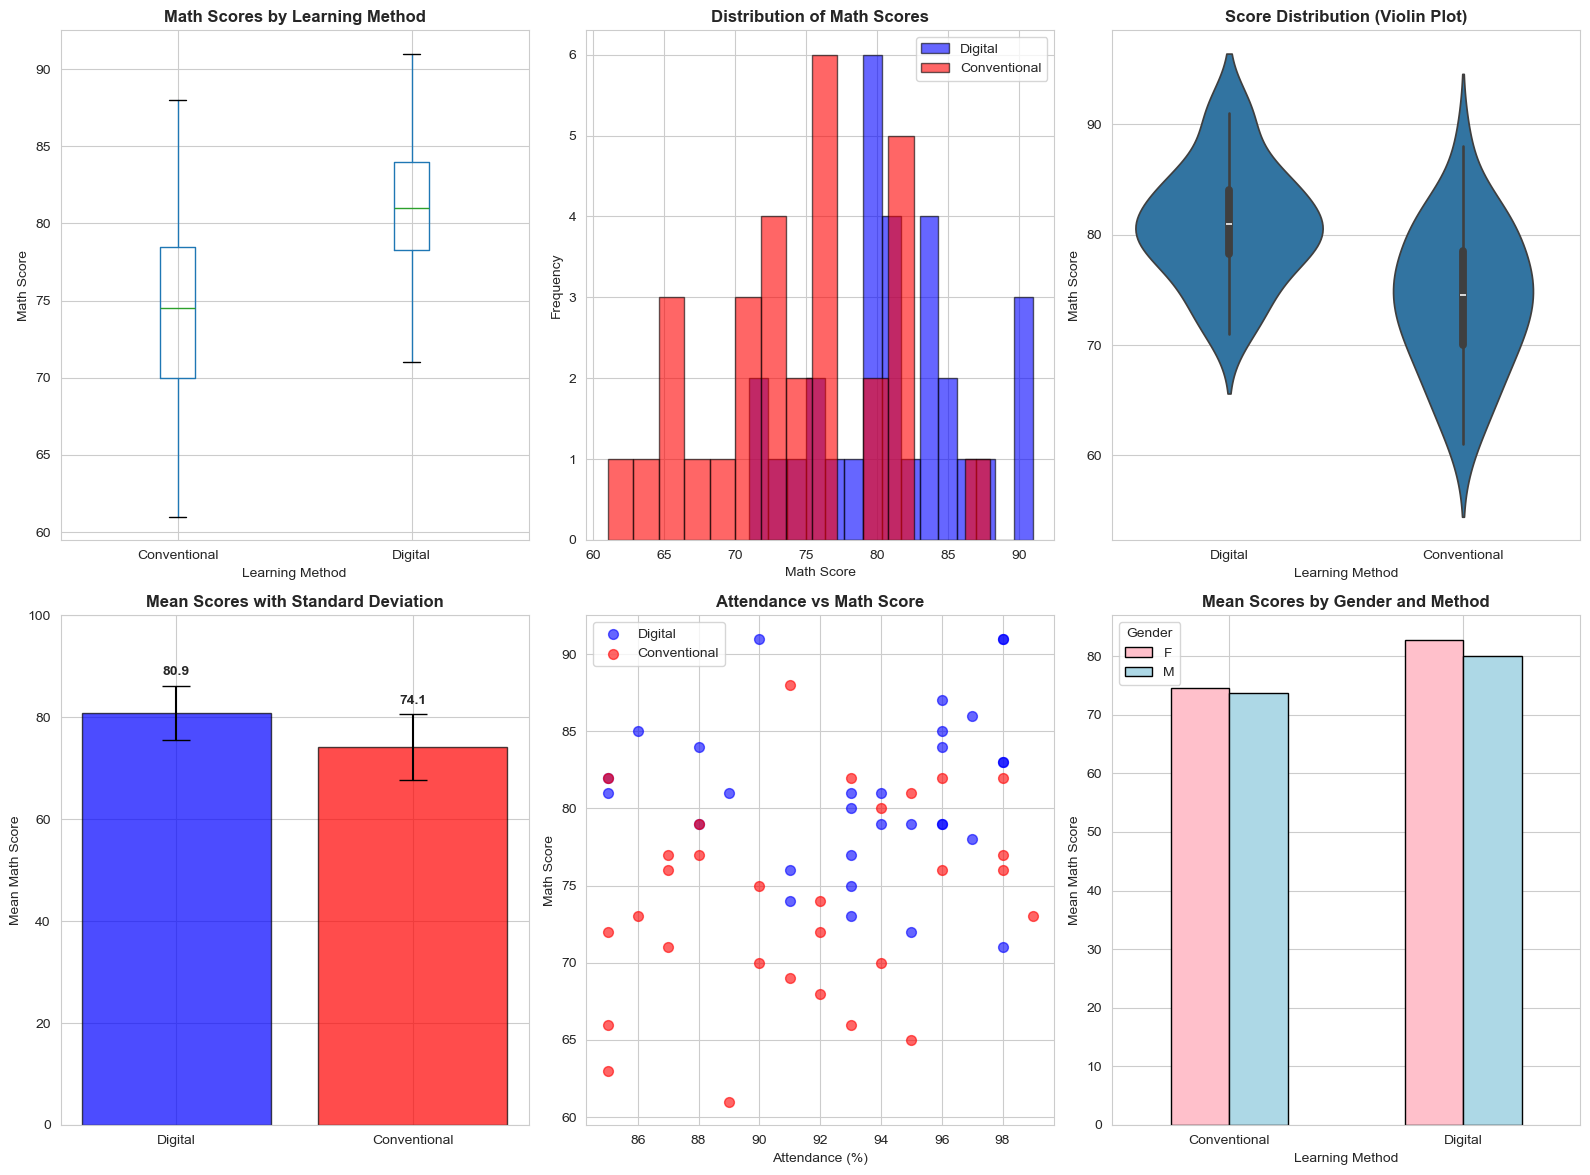


Analysis complete! All results have been displayed above.


In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the data
# Try to load from current directory, if not found, ask user for path
import os

try:
    data = pd.read_csv(r'D:\ITU MSDS\Semster-1\Mathematical and Statistical Method for Data Analysis\Projects\Marks.csv')
except FileNotFoundError:
    print("ERROR: 'Marks.csv' not found in current directory!")
    print(f"Current working directory: {os.getcwd()}")
    print("\nPlease do ONE of the following:")
    print("1. Move 'Marks.csv' to the current directory")
    print("2. Update the file path in the code below\n")
    
    # Alternative: Uncomment and update the path below
    # data = pd.read_csv(r'C:\Users\YourName\Documents\Marks.csv')
    
    raise

print("="*70)
print("IMPACT OF DIGITAL LEARNING ON MATHEMATICS ACHIEVEMENT")
print("Statistical Analysis Report")
print("="*70)
print("\n")

# 1. DATA OVERVIEW
print("1. DATA OVERVIEW")
print("-"*70)
print(f"Total Students: {len(data)}")
print(f"Digital Learning Group: {len(data[data['Group'] == 'Digital'])}")
print(f"Conventional Learning Group: {len(data[data['Group'] == 'Conventional'])}")
print("\nFirst few rows of data:")
print(data.head())
print("\n")

# 2. DESCRIPTIVE STATISTICS
print("2. DESCRIPTIVE STATISTICS")
print("-"*70)

# Separate groups
digital_scores = data[data['Group'] == 'Digital']['Math_Score']
conventional_scores = data[data['Group'] == 'Conventional']['Math_Score']

print("\nDigital Learning Group:")
print(f"  Mean: {digital_scores.mean():.2f}")
print(f"  Median: {digital_scores.median():.2f}")
print(f"  Std Dev: {digital_scores.std():.2f}")
print(f"  Min: {digital_scores.min()}")
print(f"  Max: {digital_scores.max()}")
print(f"  Range: {digital_scores.max() - digital_scores.min()}")

print("\nConventional Learning Group:")
print(f"  Mean: {conventional_scores.mean():.2f}")
print(f"  Median: {conventional_scores.median():.2f}")
print(f"  Std Dev: {conventional_scores.std():.2f}")
print(f"  Min: {conventional_scores.min()}")
print(f"  Max: {conventional_scores.max()}")
print(f"  Range: {conventional_scores.max() - conventional_scores.min()}")

print(f"\nMean Difference: {digital_scores.mean() - conventional_scores.mean():.2f} points")
print("\n")

# 3. ASSUMPTION CHECKS FOR T-TEST
print("3. ASSUMPTION CHECKS FOR INDEPENDENT T-TEST")
print("-"*70)

# Test for normality using Shapiro-Wilk test
print("\nNormality Test (Shapiro-Wilk):")
shapiro_digital = stats.shapiro(digital_scores)
shapiro_conventional = stats.shapiro(conventional_scores)

print(f"  Digital Group: W={shapiro_digital.statistic:.4f}, p-value={shapiro_digital.pvalue:.4f}")
if shapiro_digital.pvalue > 0.05:
    print("    → Data appears normally distributed (p > 0.05)")
else:
    print("    → Data may not be normally distributed (p < 0.05)")

print(f"  Conventional Group: W={shapiro_conventional.statistic:.4f}, p-value={shapiro_conventional.pvalue:.4f}")
if shapiro_conventional.pvalue > 0.05:
    print("    → Data appears normally distributed (p > 0.05)")
else:
    print("    → Data may not be normally distributed (p < 0.05)")

# Test for equal variances using Levene's test
print("\nHomogeneity of Variance Test (Levene's):")
levene_test = stats.levene(digital_scores, conventional_scores)
print(f"  F-statistic={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")
if levene_test.pvalue > 0.05:
    print("    → Variances are equal (p > 0.05)")
    equal_var = True
else:
    print("    → Variances are not equal (p < 0.05)")
    equal_var = False
print("\n")

# 4. HYPOTHESIS TESTING
print("4. HYPOTHESIS TESTING")
print("-"*70)
print("\nResearch Question:")
print("Does digital learning result in significantly higher math scores")
print("compared to traditional classroom methods for Grade 9 students?")

print("\nHypotheses:")
print("  H₀ (Null): μ_digital = μ_conventional")
print("      (No significant difference in mean scores)")
print("  H₁ (Alternative): μ_digital > μ_conventional")
print("      (Digital learning results in higher scores)")

print("\nSignificance Level: α = 0.05")

# Perform independent samples t-test
t_statistic, p_value_two_tailed = stats.ttest_ind(digital_scores, 
                                                    conventional_scores, 
                                                    equal_var=equal_var)

# One-tailed p-value (since we're testing if digital > conventional)
p_value_one_tailed = p_value_two_tailed / 2 if t_statistic > 0 else 1 - (p_value_two_tailed / 2)

print("\nTest Results:")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  p-value (two-tailed): {p_value_two_tailed:.4f}")
print(f"  p-value (one-tailed): {p_value_one_tailed:.4f}")

# Degrees of freedom
df = len(digital_scores) + len(conventional_scores) - 2
print(f"  Degrees of freedom: {df}")

# Cohen's d for effect size
pooled_std = np.sqrt(((len(digital_scores)-1)*digital_scores.std()**2 + 
                       (len(conventional_scores)-1)*conventional_scores.std()**2) / df)
cohens_d = (digital_scores.mean() - conventional_scores.mean()) / pooled_std
print(f"  Cohen's d (effect size): {cohens_d:.4f}")

if abs(cohens_d) < 0.2:
    effect_interpretation = "negligible"
elif abs(cohens_d) < 0.5:
    effect_interpretation = "small"
elif abs(cohens_d) < 0.8:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"
print(f"    → Effect size is {effect_interpretation}")

# 95% Confidence Interval for the difference
diff_mean = digital_scores.mean() - conventional_scores.mean()
se_diff = pooled_std * np.sqrt(1/len(digital_scores) + 1/len(conventional_scores))
ci_lower = diff_mean - 1.96 * se_diff
ci_upper = diff_mean + 1.96 * se_diff
print(f"\n  95% Confidence Interval for mean difference: [{ci_lower:.2f}, {ci_upper:.2f}]")

print("\n" + "="*70)
print("5. CONCLUSION")
print("="*70)
if p_value_one_tailed < 0.05:
    print("\n✓ REJECT the null hypothesis (p < 0.05)")
    print(f"\nThere IS statistically significant evidence that digital learning")
    print(f"results in higher mathematics scores compared to conventional methods.")
    print(f"\nThe digital group scored an average of {diff_mean:.2f} points higher")
    print(f"than the conventional group, with a {effect_interpretation} effect size.")
else:
    print("\n✗ FAIL TO REJECT the null hypothesis (p ≥ 0.05)")
    print(f"\nThere is NOT sufficient statistical evidence that digital learning")
    print(f"results in significantly higher mathematics scores.")

print("\n" + "="*70)
print("6. ADDITIONAL INSIGHTS")
print("="*70)

# Gender analysis
print("\nGender Distribution:")
gender_group = data.groupby(['Group', 'Gender']).size().unstack(fill_value=0)
print(gender_group)

# Attendance analysis
print("\nAttendance Statistics:")
digital_attendance = data[data['Group'] == 'Digital']['Attendance (%)']
conventional_attendance = data[data['Group'] == 'Conventional']['Attendance (%)']
print(f"  Digital Group Mean Attendance: {digital_attendance.mean():.2f}%")
print(f"  Conventional Group Mean Attendance: {conventional_attendance.mean():.2f}%")

# Correlation between attendance and scores
print("\nCorrelation between Attendance and Math Scores:")
correlation_digital = data[data['Group'] == 'Digital'][['Attendance (%)', 'Math_Score']].corr().iloc[0,1]
correlation_conv = data[data['Group'] == 'Conventional'][['Attendance (%)', 'Math_Score']].corr().iloc[0,1]
print(f"  Digital Group: r = {correlation_digital:.3f}")
print(f"  Conventional Group: r = {correlation_conv:.3f}")

print("\n" + "="*70)
print("END OF ANALYSIS")
print("="*70)

# VISUALIZATIONS
print("\n\nGenerating visualizations...")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 1. Box plot comparison
ax1 = plt.subplot(2, 3, 1)
data.boxplot(column='Math_Score', by='Group', ax=ax1)
plt.title('Math Scores by Learning Method', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Learning Method', fontsize=10)
plt.ylabel('Math Score', fontsize=10)

# 2. Histogram comparison
ax2 = plt.subplot(2, 3, 2)
plt.hist(digital_scores, alpha=0.6, label='Digital', bins=15, color='blue', edgecolor='black')
plt.hist(conventional_scores, alpha=0.6, label='Conventional', bins=15, color='red', edgecolor='black')
plt.xlabel('Math Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of Math Scores', fontsize=12, fontweight='bold')
plt.legend()

# 3. Violin plot
ax3 = plt.subplot(2, 3, 3)
sns.violinplot(data=data, x='Group', y='Math_Score', ax=ax3)
plt.title('Score Distribution (Violin Plot)', fontsize=12, fontweight='bold')
plt.xlabel('Learning Method', fontsize=10)
plt.ylabel('Math Score', fontsize=10)

# 4. Bar plot of means with error bars
ax4 = plt.subplot(2, 3, 4)
means = [digital_scores.mean(), conventional_scores.mean()]
stds = [digital_scores.std(), conventional_scores.std()]
groups = ['Digital', 'Conventional']
plt.bar(groups, means, yerr=stds, capsize=10, color=['blue', 'red'], alpha=0.7, edgecolor='black')
plt.ylabel('Mean Math Score', fontsize=10)
plt.title('Mean Scores with Standard Deviation', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
for i, v in enumerate(means):
    plt.text(i, v + stds[i] + 2, f'{v:.1f}', ha='center', fontweight='bold')

# 5. Scatter plot: Attendance vs Math Score
ax5 = plt.subplot(2, 3, 5)
digital_data = data[data['Group'] == 'Digital']
conv_data = data[data['Group'] == 'Conventional']
plt.scatter(digital_data['Attendance (%)'], digital_data['Math_Score'], 
           alpha=0.6, label='Digital', color='blue', s=50)
plt.scatter(conv_data['Attendance (%)'], conv_data['Math_Score'], 
           alpha=0.6, label='Conventional', color='red', s=50)
plt.xlabel('Attendance (%)', fontsize=10)
plt.ylabel('Math Score', fontsize=10)
plt.title('Attendance vs Math Score', fontsize=12, fontweight='bold')
plt.legend()

# 6. Gender comparison
ax6 = plt.subplot(2, 3, 6)
gender_means = data.groupby(['Group', 'Gender'])['Math_Score'].mean().unstack()
gender_means.plot(kind='bar', ax=ax6, color=['pink', 'lightblue'], edgecolor='black')
plt.title('Mean Scores by Gender and Method', fontsize=12, fontweight='bold')
plt.xlabel('Learning Method', fontsize=10)
plt.ylabel('Mean Math Score', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.tight_layout()
plt.savefig('analysis_visualizations.png', dpi=300, bbox_inches='tight')
print("Visualizations saved as 'analysis_visualizations.png'")
plt.show()

print("\nAnalysis complete! All results have been displayed above.")